In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [10]:
img = cv2.imread('data_01/berlin.jpg')
img.shape

(560, 960, 3)

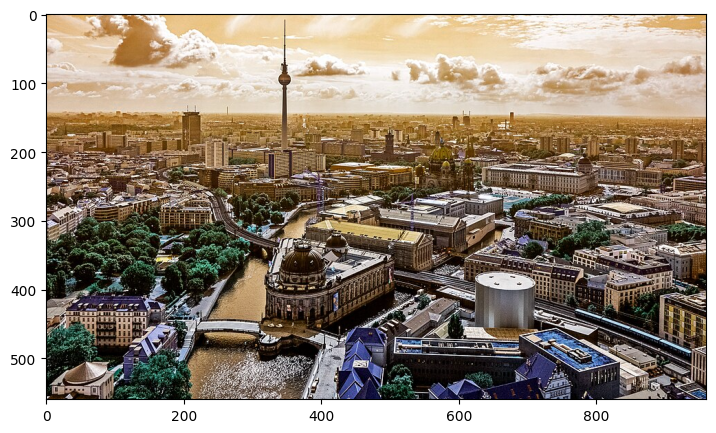

In [12]:
plt.imshow(img)
# bad view - BGR not RGB

In [16]:
img

array([[[218, 178, 120],
        [222, 182, 124],
        [224, 183, 128],
        ...,
        [224, 173, 103],
        [217, 169,  97],
        [219, 171,  99]],

       [[219, 179, 121],
        [221, 181, 123],
        [220, 179, 124],
        ...,
        [216, 168,  96],
        [212, 164,  92],
        [214, 166,  94]],

       [[226, 183, 126],
        [227, 184, 127],
        [221, 180, 125],
        ...,
        [223, 175, 103],
        [220, 172, 100],
        [222, 177, 103]],

       ...,

       [[251, 252, 255],
        [252, 251, 253],
        [250, 245, 244],
        ...,
        [  0,  15,  60],
        [  5,  27,  79],
        [  1,  24,  80]],

       [[253, 254, 255],
        [251, 248, 250],
        [255, 255, 252],
        ...,
        [ 66,  80, 128],
        [ 84,  98, 151],
        [ 67,  82, 138]],

       [[139, 140, 144],
        [165, 163, 163],
        [ 39,  30,  27],
        ...,
        [120, 129, 179],
        [ 98, 109, 161],
        [ 98, 110, 164]]

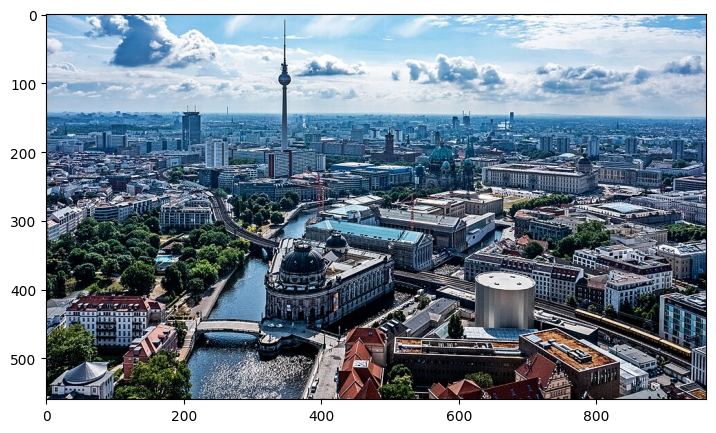

In [20]:
# BGR to RGB
rows, cols, channels = img.shape
img_rgb = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        img_rgb[r, c, 0] = pixel[2]
        img_rgb[r, c, 1] = pixel[1]
        img_rgb[r, c, 2] = pixel[0]

plt.imshow(img_rgb)

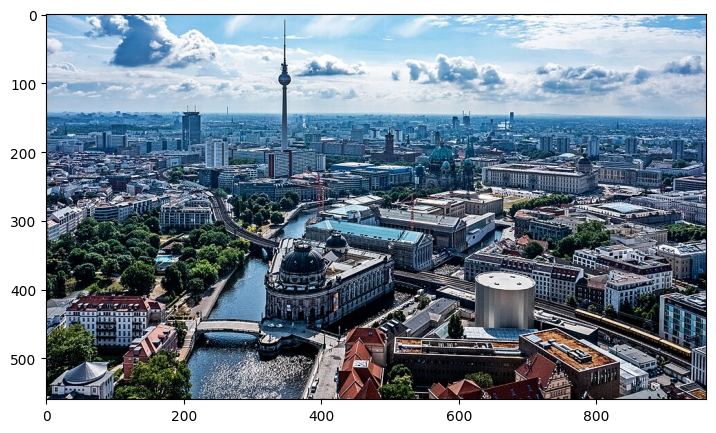

In [32]:
# BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

(560, 960)

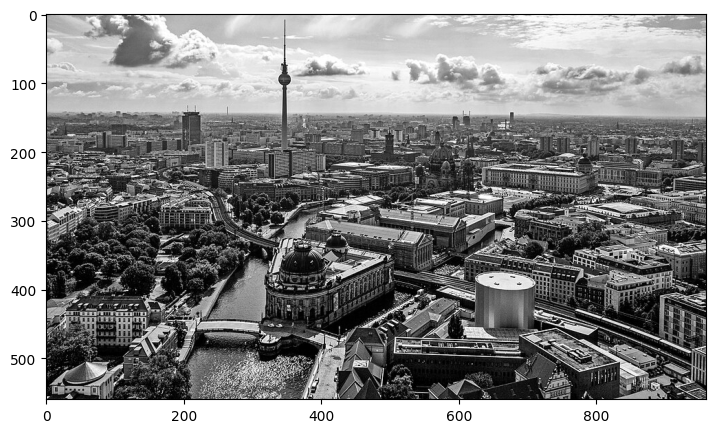

In [28]:
## result: gray image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
img_gray.shape

In [40]:
# numpy [row, column, channel]
img_rgb[10, 20, 1]

185

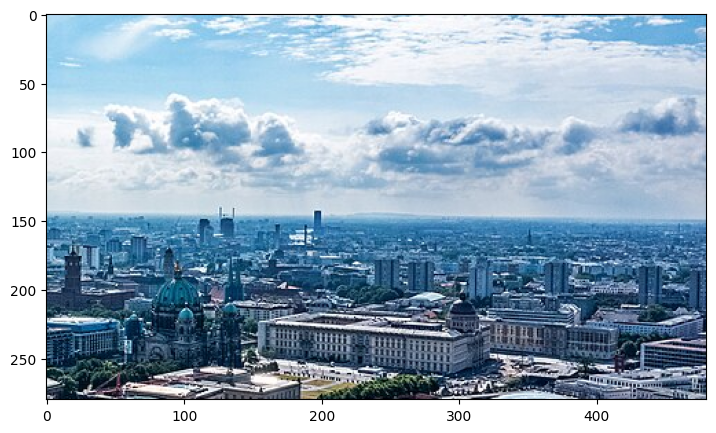

In [36]:
plt.imshow(img_rgb[0:rows//2, cols//2:, :])

Image Loading Alternatives
Apart from OpenCV there are other packages that allow you to read images, e.g., scikit-image, torchvision or Pillow, among many others.

RGB vs CieLAB

(<Axes: title={'center': 'Color 3'}>,
 Text(0.5, 1.0, 'Color 3'))

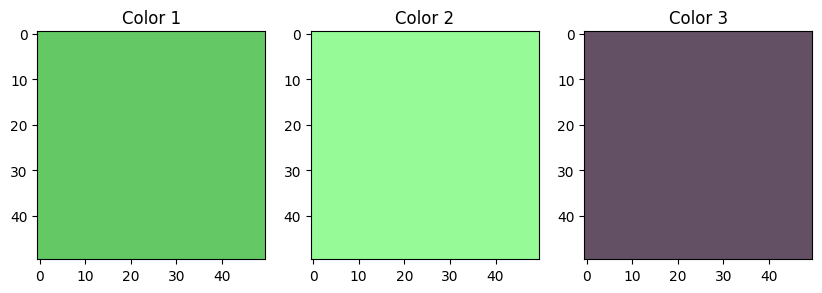

In [46]:
color_1 = np.zeros((50, 50, 3), dtype=np.uint8)
color_1[..., 0] = 100
color_1[..., 1] = 200
color_1[..., 2] = 100

# [color_1 - color_2] = 150
color_2 = np.zeros((50, 50, 3), dtype=np.uint8)
color_2[..., 0] = 150
color_2[..., 1] = 250
color_2[..., 2] = 150

# [color_1 - color_3] = 120
color_3 = np.zeros((50, 50, 3), dtype=np.uint8)
color_3[..., 0] = 100
color_3[..., 1] = 80
color_3[..., 2] = 100

plt.subplot(131), plt.imshow(color_1), plt.title('Color 1')
plt.subplot(132), plt.imshow(color_2), plt.title('Color 2')
plt.subplot(133), plt.imshow(color_3), plt.title('Color 3')

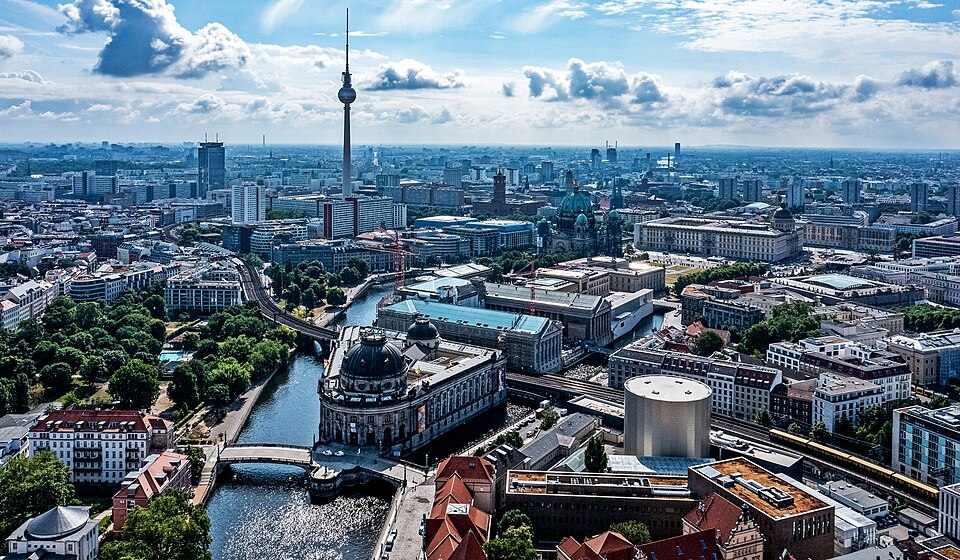

In [42]:
from PIL import Image
img = Image.open('data_01/berlin.jpg')
img

In [50]:
color_1_lab = cv2.cvtColor(color_1, cv2.COLOR_RGB2LAB)
color_2_lab = cv2.cvtColor(color_2, cv2.COLOR_RGB2LAB)
color_3_lab = cv2.cvtColor(color_3, cv2.COLOR_RGB2LAB)

print('Color 1 (LAB)', color_1_lab[0, 0, :])
print('Color 2 (LAB)', color_2_lab[0, 0, :])
print('Color 3 (LAB)', color_3_lab[0, 0, :])

print(' ')
print('SAD with respect to color 1')
print('Color 2', np.sum(np.abs(color_1_lab[0, 0, :].astype(np.float32) - color_2_lab[0, 0, :].astype(np.float32))))
print('Color 3', np.sum(np.abs(color_1_lab[0, 0, :].astype(np.float32) - color_3_lab[0, 0, :].astype(np.float32))))

Color 1 (LAB) [186  79 169]
Color 2 (LAB) [231  79 167]
Color 3 (LAB) [ 94 140 119]
 
SAD with respect to color 1
Color 2 47.0
Color 3 203.0
